# 1. Introduction

## 1.1 Problem Statement
> In healthcare industry, it is always challenging to predict insurance cost accurately because of uncertainty and complexity of insurance plans.

## 1.2 Objective & Methodology 

**Objective**

> The objective of this project is to predict the insurance charges based on the given demographic and health information of individuals. 

**Methodology**

> This project aims to investigate the relationship between various patient characteristics and medical costs using multiple linear regression with forward/backward feature selection, as well as incorporating regularization methods such as Ridge regression, LASSO regression, and Elastic Net (with a ratio of 0.5). Additionally, a neural network approach was employed to explore the predict the outcome variable. Model performance was evaluated using R-squared, Root-mean-squared error (RMSE), and mean absolute error (MAE).

## 1.3 Load Libraries

In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from mlxtend.feature_selection import SequentialFeatureSelector
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.linear_model import Ridge, Lasso, ElasticNet
import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, f1_score
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


## 1.4 Load data

In [44]:
datafile = "https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv"
data = pd.read_csv(datafile)
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## 1.5 Data Summary

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int

In [46]:
print(data.shape)

(1338, 7)
(1338, 7)


In [47]:
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [48]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### Pre-processing (Categorical variables into numerical values)

In [49]:
#sex
le = LabelEncoder()
le.fit(data.sex.drop_duplicates()) 
data.sex = le.transform(data.sex)
# smoker or not
le.fit(data.smoker.drop_duplicates()) 
data.smoker = le.transform(data.smoker)
#region
le.fit(data.region.drop_duplicates()) 
data.region = le.transform(data.region)

In [50]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


# 2. Exploratory Data Analysis (EDA)

## 2.1 BMI vs Charges (Target)

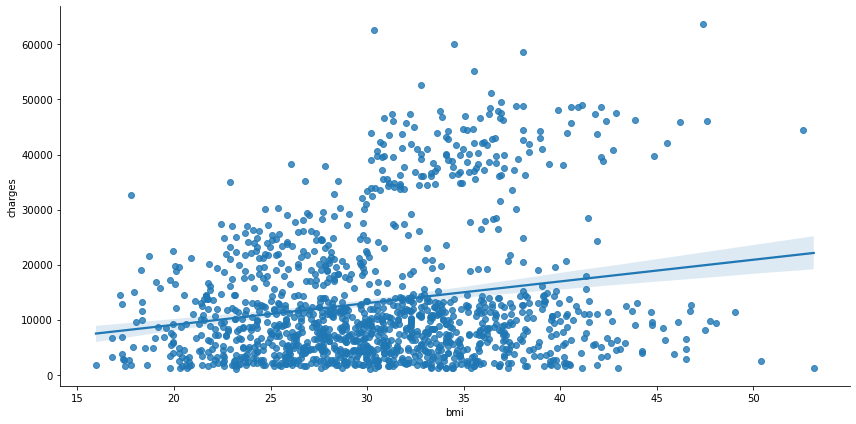

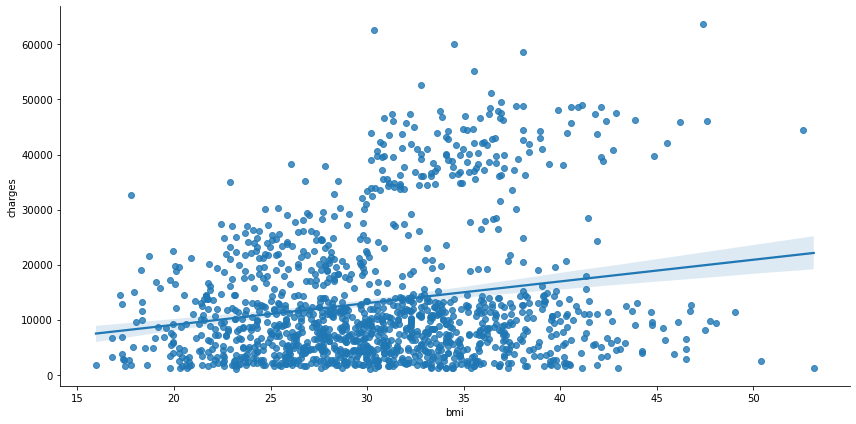

In [51]:
sns.lmplot(data=data, x = "bmi", y="charges", aspect =2, height = 6)

## 2.2 Boxplot of variables

<AxesSubplot:>

<AxesSubplot:>

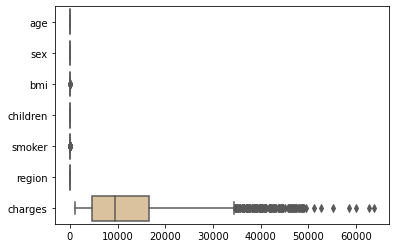

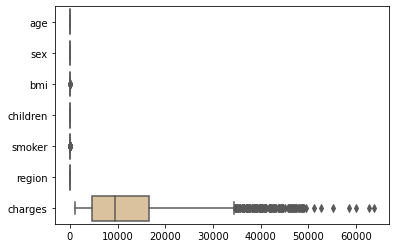

In [52]:
sns.boxplot(data=data, orient='h', palette='Set2')

## 2.3 Correlation Heatmap

Text(0.5, 1.0, 'Correlation Heatmap')

Text(0.5, 1.0, 'Correlation Heatmap')

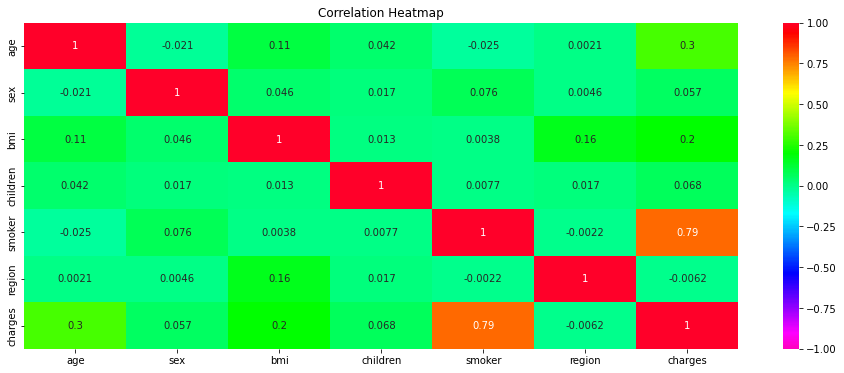

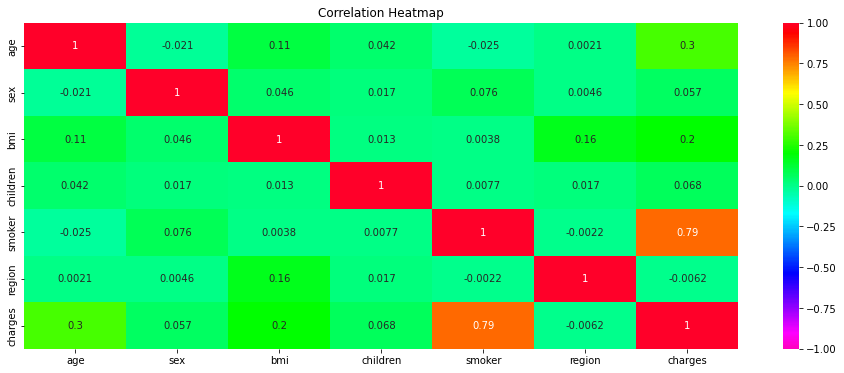

In [53]:
plt.figure(figsize=(16,6))

heatmap = sns.heatmap(data.corr(),vmin=-1, vmax=1, annot=True, cmap='gist_rainbow_r')

heatmap.set_title('Correlation Heatmap')

> Strong positive correlation is observed with 'Smoker' and 'Charges(Target)'.

## 2.4 Insurance Charges (Target)

C:\Users\jisoo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\jisoo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\jisoo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

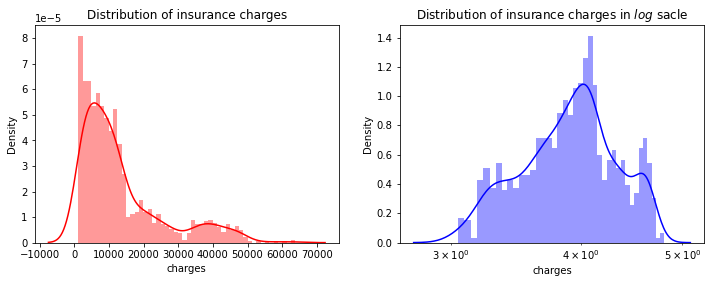

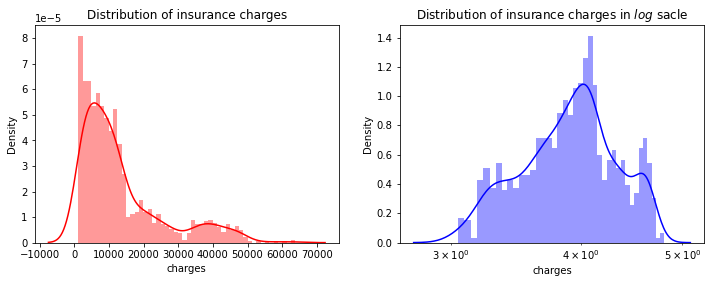

In [54]:
f= plt.figure(figsize=(12,4))

ax=f.add_subplot(121)
sns.distplot(data['charges'],bins=50,color='r',ax=ax)
ax.set_title('Distribution of insurance charges')

ax=f.add_subplot(122)
sns.distplot(np.log10(data['charges']),bins=40,color='b',ax=ax)
ax.set_title('Distribution of insurance charges in $log$ sacle')
ax.set_xscale('log');

## 2.5 Smoker

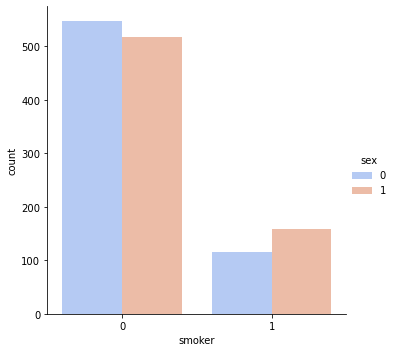

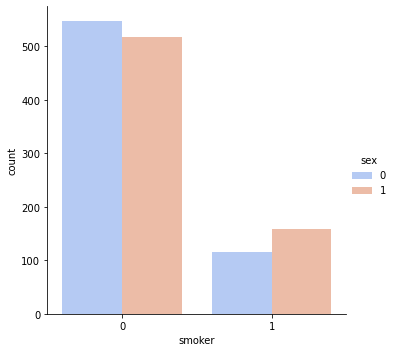

In [55]:
sns.catplot(x="smoker", kind="count",hue = 'sex', palette="coolwarm", data=data)

> More male smokers (sex = 0) than women smokers.

## 2.6 Charges depending on smoker and sex

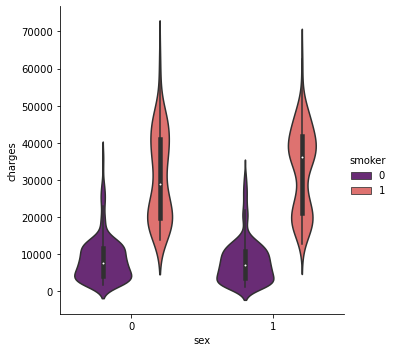

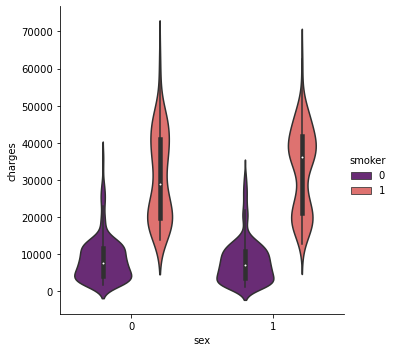

In [56]:
sns.catplot(x="sex", y="charges", hue="smoker",
            kind="violin", data=data, palette = 'magma')

> There is no significant difference between male and female smokers

## 2.7 Charges of female and male

<AxesSubplot:title={'center':'Box plot for charges of women'}, xlabel='charges', ylabel='smoker'>

<AxesSubplot:title={'center':'Box plot for charges of women'}, xlabel='charges', ylabel='smoker'>

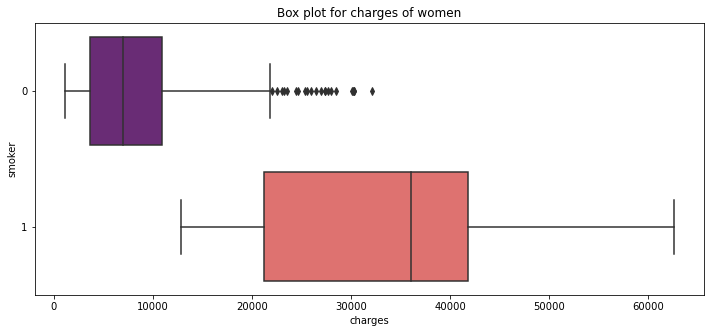

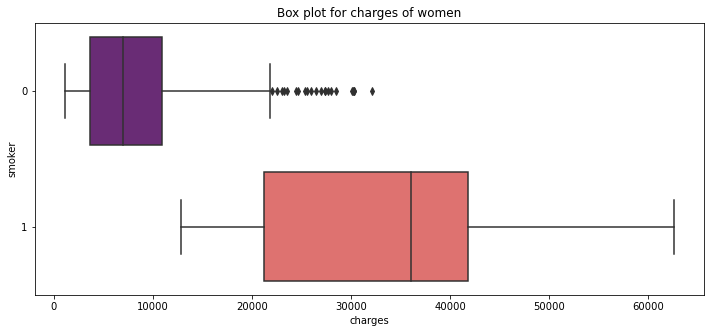

In [57]:
plt.figure(figsize=(12,5))
plt.title("Box plot for charges of women")
sns.boxplot(y="smoker", x="charges", data =  data[(data.sex == 1)] , orient="h", palette = 'magma')

<AxesSubplot:title={'center':'Box plot for charges of men'}, xlabel='charges', ylabel='smoker'>

<AxesSubplot:title={'center':'Box plot for charges of men'}, xlabel='charges', ylabel='smoker'>

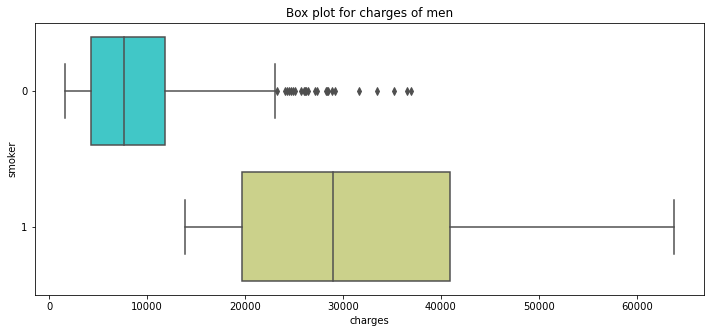

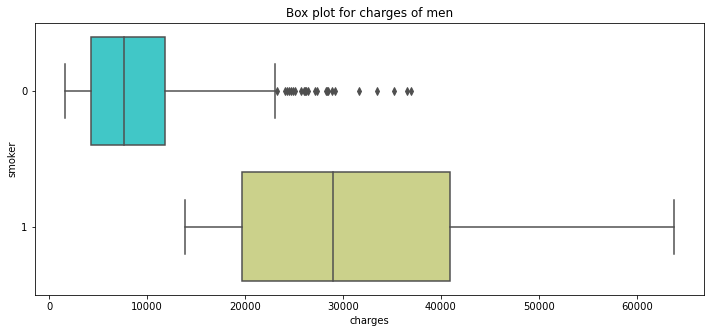

In [58]:
plt.figure(figsize=(12,5))
plt.title("Box plot for charges of men")
sns.boxplot(y="smoker", x="charges", data =  data[(data.sex == 0)] , orient="h", palette = 'rainbow')

## 2.8 Distribution of age

C:\Users\jisoo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\jisoo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


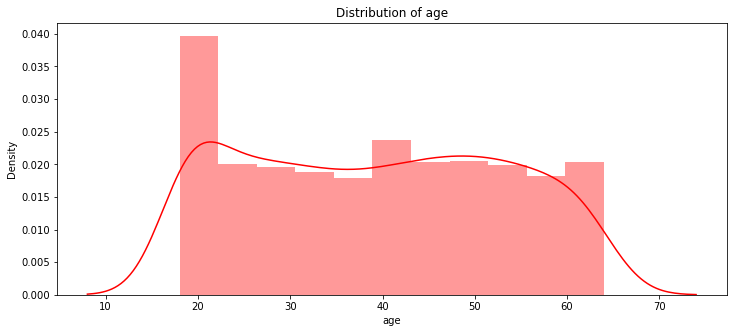

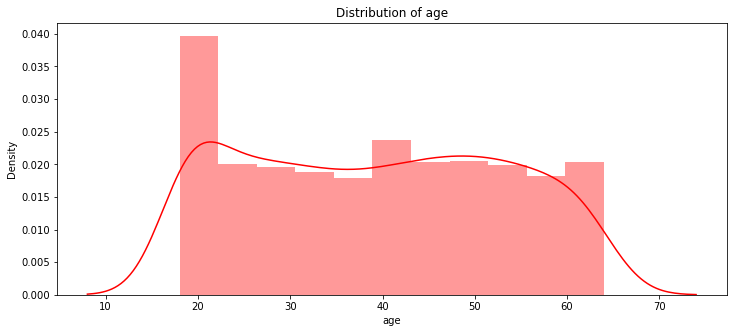

In [59]:
plt.figure(figsize=(12,5))
plt.title("Distribution of age")
ax = sns.distplot(data["age"], color = 'r')

## 2.9 Charges by age and smoker

Text(0.5, 1.0, 'Smokers and non-smokers')

Text(0.5, 1.0, 'Smokers and non-smokers')

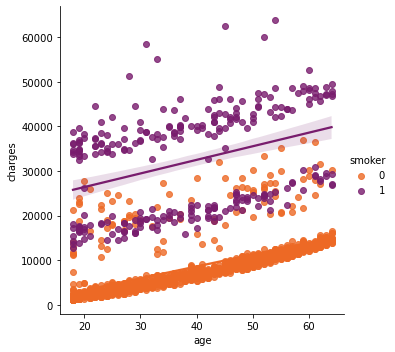

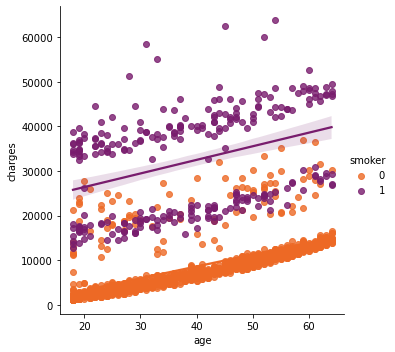

In [60]:
sns.lmplot(x="age", y="charges", hue="smoker", data=data, palette = 'inferno_r')
ax.set_title('Smokers and non-smokers')

## 2.10 Distribution of BMI

C:\Users\jisoo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\jisoo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


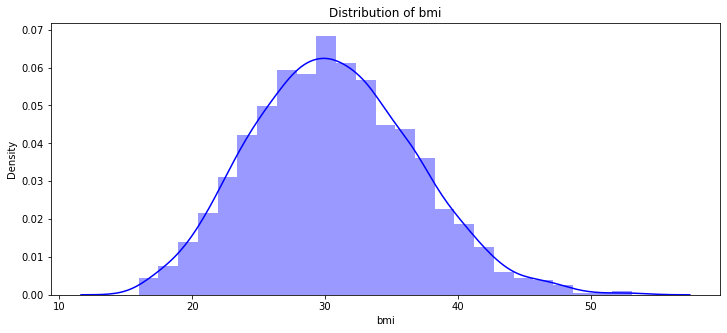

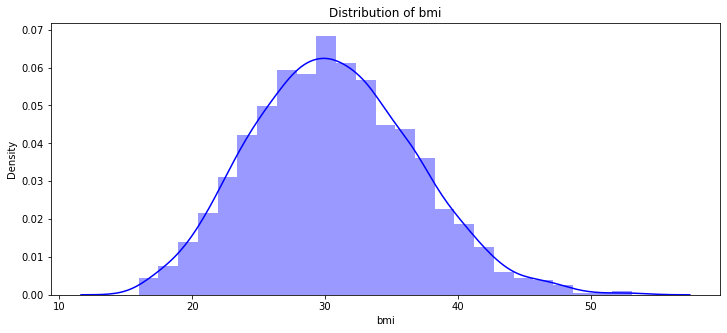

In [61]:
plt.figure(figsize=(12,5))
plt.title("Distribution of bmi")
ax = sns.distplot(data["bmi"], color = 'b')

> Normally distributed

## 2.11 Distribution of Charges

C:\Users\jisoo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\jisoo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


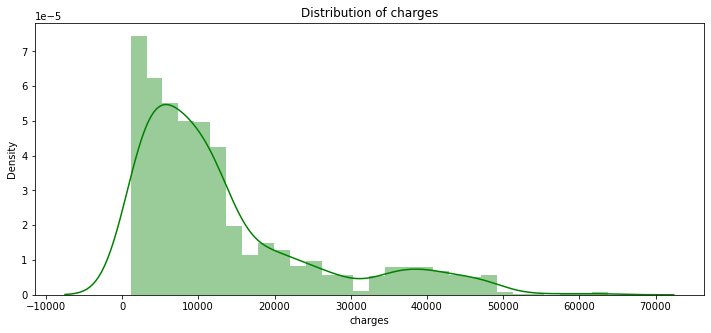

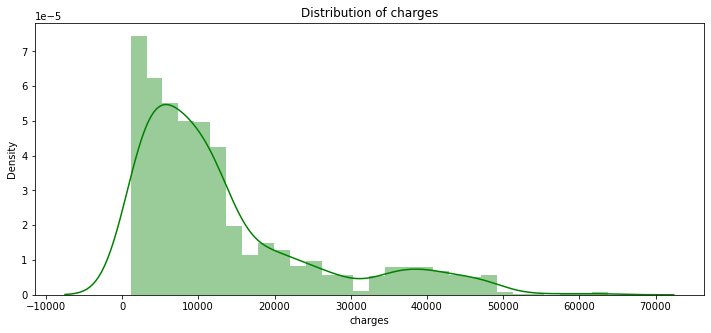

In [62]:
plt.figure(figsize=(12,5))
plt.title("Distribution of charges")
ax = sns.distplot(data["charges"], color = 'g')

## 2.12 Charges by BMI

Text(0.5, 1.0, 'Scatter plot of charges and bmi')

Text(0.5, 1.0, 'Scatter plot of charges and bmi')

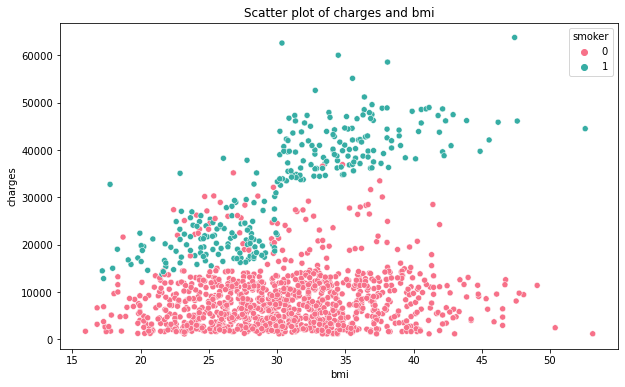

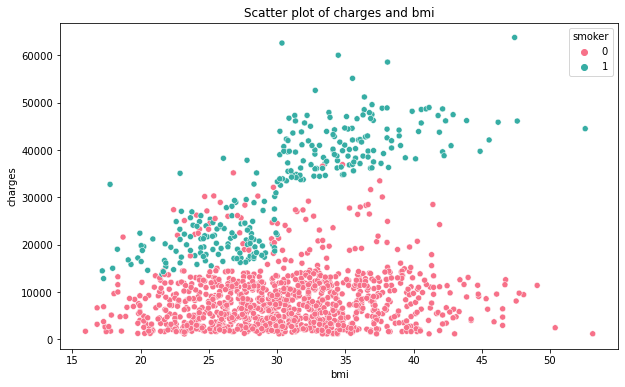

In [63]:
plt.figure(figsize=(10,6))
ax = sns.scatterplot(x='bmi',y='charges',data=data,palette='husl',hue='smoker')
ax.set_title('Scatter plot of charges and bmi')

# 3. Modeling

## 3.1 Random Forest Regressor

In [64]:
X = data.drop('charges', axis=1)
y = data['charges']

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

In [66]:

rf = RandomForestRegressor()

In [67]:
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)


RandomForestRegressor()

RandomForestRegressor()

In [68]:
pred = model.predict(X_test)

In [69]:
mae_rf = mean_absolute_error(y_test, pred)
print("Mean Absolute Error:", mae_rf)

Mean Absolute Error: 2788.836733460697
Mean Absolute Error: 2788.836733460697


In [70]:
result = pd.DataFrame({'actual': y_test, 'pred': pred})
result

,actual,pred
12,1826.84300,4257.310817
306,20177.67113,4658.950073
318,7421.19455,14645.452756
815,1877.92940,2722.443440
157,15518.18025,17454.660744
...,...,...
713,1984.45330,5503.230962
1282,14283.45940,14145.987970
531,14043.47670,13958.609832
537,8825.08600,8943.277822


,actual,pred
12,1826.84300,4257.310817
306,20177.67113,4658.950073
318,7421.19455,14645.452756
815,1877.92940,2722.443440
157,15518.18025,17454.660744
...,...,...
713,1984.45330,5503.230962
1282,14283.45940,14145.987970
531,14043.47670,13958.609832
537,8825.08600,8943.277822


In [71]:

print(f"R2 score: {r2_score(y_test, pred)}")
print(f"Mean squared error: {mean_squared_error(y_test, pred, squared = False)}")

rf_mse = mean_squared_error(y_test, pred, squared = False)

R2 score: 0.8655096210437773
Mean squared error: 4592.295526331348
R2 score: 0.8655096210437773
Mean squared error: 4592.295526331348


In [72]:
rf_r2 = r2_score(y_test, pred)
rf_rmse = np.sqrt(mean_squared_error(y_test, pred))

## 3.2.1 Regression (Forward)

In [73]:
lr = LinearRegression()

In [74]:
X_train.shape

(1070, 6)

(1070, 6)

In [75]:
Forward_Feature_Selector = SequentialFeatureSelector(lr,
           k_features= 3,
           forward=True,
           floating=False,
           scoring='r2',
           cv=5)

In [76]:
sfs = Forward_Feature_Selector.fit(X_train, y_train)

In [77]:
print('Selected features:', sfs.k_feature_idx_)

Selected features: (0, 2, 4)
Selected features: (0, 2, 4)


In [78]:
sfs.k_feature_names_

('age', 'bmi', 'smoker')

('age', 'bmi', 'smoker')

In [79]:
print('Selected score:', sfs.k_score_)

Selected score: 0.7240927322048278
Selected score: 0.7240927322048278


In [80]:
X_train_selected = sfs.transform(X_train)

In [81]:
reg = LinearRegression()
reg.fit(X_train_selected, y_train)

LinearRegression()

LinearRegression()

In [82]:
X_test_selected = sfs.transform(X_test)
y_pred = reg.predict(X_test_selected)

In [85]:
mae_lr = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae_lr)

Mean Absolute Error: 3927.5850813981397
Mean Absolute Error: 3927.5850813981397


In [86]:
result = pd.DataFrame({'actual': y_test, 'y_pred': y_pred})
result

,actual,y_pred
12,1826.84300,5247.193434
306,20177.67113,4512.285499
318,7421.19455,8813.390365
815,1877.92940,3568.817762
157,15518.18025,24654.932456
...,...,...
713,1984.45330,6265.862551
1282,14283.45940,23602.755715
531,14043.47670,14826.103654
537,8825.08600,10110.414211


,actual,y_pred
12,1826.84300,5247.193434
306,20177.67113,4512.285499
318,7421.19455,8813.390365
815,1877.92940,3568.817762
157,15518.18025,24654.932456
...,...,...
713,1984.45330,6265.862551
1282,14283.45940,23602.755715
531,14043.47670,14826.103654
537,8825.08600,10110.414211


In [87]:

print(f"R2 score: {r2_score(y_test, y_pred)}")
print(f"Mean squared error: {mean_squared_error(y_test, y_pred, squared = False)}")

R2 score: 0.7916580391198964
Mean squared error: 5715.741686057347
R2 score: 0.7916580391198964
Mean squared error: 5715.741686057347


In [88]:
lr_r2 = r2_score(y_test, y_pred)
lr_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

## 3.2.1 Regression (Backward)

In [89]:
Backward_Feature_Selector = SequentialFeatureSelector(lr,
           k_features= 3,
           forward=False,
           floating=False,
           scoring='r2',
           cv=5)

In [90]:
bfs = Forward_Feature_Selector.fit(X_train, y_train)

In [91]:
print('Selected features:', bfs.k_feature_idx_)

Selected features: (0, 2, 4)
Selected features: (0, 2, 4)


In [92]:
bfs.k_feature_names_

('age', 'bmi', 'smoker')

('age', 'bmi', 'smoker')

print('Selected score:', bfs.k_score_)

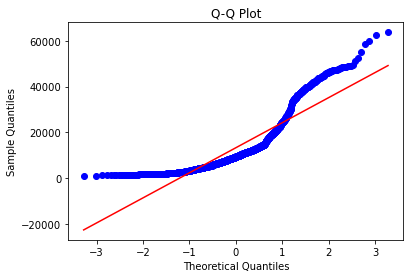

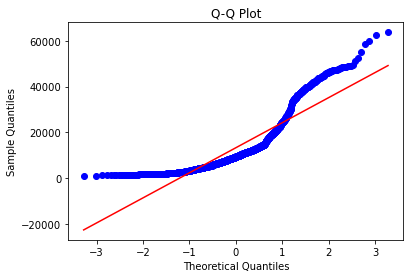

In [93]:

res = stats.probplot(data["charges"], plot = plt)
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.title("Q-Q Plot")
plt.show()

In [94]:
data["charges"]

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

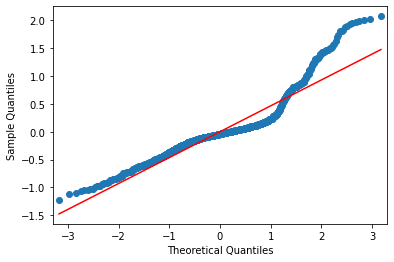

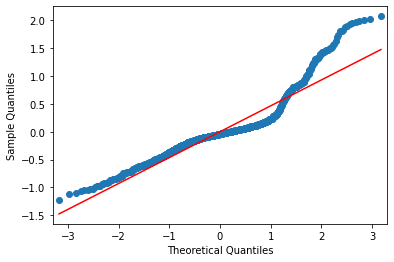

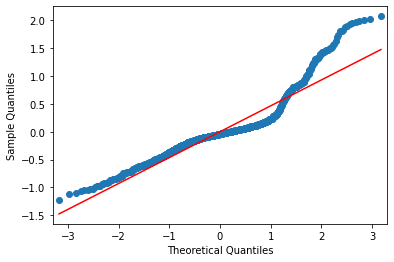

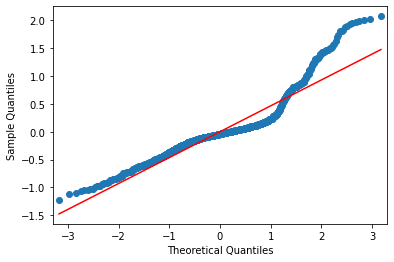

In [95]:

X = data[["age", "bmi", "smoker"]]
y = np.log(data["charges"])
model = sm.OLS(y, sm.add_constant(X)).fit()
residuals = model.resid
sm.ProbPlot(residuals).qqplot(line = "s")

## 3.3 Regularization

In [96]:

# Load the dataset
datafile = "https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv"
data = pd.read_csv(datafile)

# Define dependent and independent variables
X = data[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
y = data['charges']

# One-hot encoding for the categorical variables
X = pd.get_dummies(X, columns=['sex'], drop_first=True)
X = pd.get_dummies(X, columns=['smoker'], drop_first=True)
X = pd.get_dummies(X, columns=['region'], drop_first=True)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ridge Regression
ridge = Ridge(alpha=0.5, normalize=True)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)
ridge_r2 = r2_score(y_test, ridge_pred)
ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_pred))
ridge_mae = mean_absolute_error(y_test, ridge_pred)

# Lasso Regression
lasso = Lasso(alpha=0.1, normalize=True)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)
lasso_r2 = r2_score(y_test, lasso_pred)
lasso_rmse = np.sqrt(mean_squared_error(y_test, lasso_pred))
lasso_mae = mean_absolute_error(y_test, lasso_pred)

# Elastic Net Regression
elastic = ElasticNet(alpha=0.1, l1_ratio=0.5, normalize=True)
elastic.fit(X_train, y_train)
elastic_pred = elastic.predict(X_test)
elastic_r2 = r2_score(y_test, elastic_pred)
elastic_rmse = np.sqrt(mean_squared_error(y_test, elastic_pred))
elastic_mae = mean_absolute_error(y_test, elastic_pred)

C:\Users\jisoo\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\jisoo\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduc

## 3.4 Neural Net

In [97]:

# Normalize the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the neural network model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(8,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, verbose=1)

# Evaluate the model
loss = model.evaluate(X_test_scaled, y_test, verbose=0)
print('Test Loss:', loss)

Epoch 1/50
Epoch 1/50
34/34 [==============================] - 2s 5ms/step - loss: 322395584.0000
Epoch 2/50
Epoch 2/50
34/34 [==============================] - 0s 5ms/step - loss: 322232288.0000
Epoch 3/50
Epoch 3/50
34/34 [==============================] - 0s 5ms/step - loss: 321834656.0000
Epoch 4/50
Epoch 4/50
34/34 [==============================] - 0s 5ms/step - loss: 321023872.0000
Epoch 5/50
Epoch 5/50
34/34 [==============================] - 0s 5ms/step - loss: 319550432.0000
Epoch 6/50
Epoch 6/50
34/34 [==============================] - 0s 5ms/step - loss: 317143648.0000
Epoch 7/50
Epoch 7/50
34/34 [==============================] - 0s 5ms/step - loss: 313543488.0000
Epoch 8/50
Epoch 8/50
34/34 [==============================] - 0s 5ms/step - loss: 308585184.0000
Epoch 9/50
Epoch 9/50
34/34 [==============================] - 0s 5ms/step - loss: 302005696.0000
Epoch 10/50
Epoch 10/50
34/34 [==============================] - 0s 5ms/step - loss: 293666560.0000
Epoch 11/50
Epoch 

34/34 [==============================] - 0s 5ms/step - loss: 35551176.0000
Epoch 47/50
Epoch 47/50
34/34 [==============================] - 0s 6ms/step - loss: 35440152.0000
Epoch 48/50
Epoch 48/50
34/34 [==============================] - 0s 6ms/step - loss: 35370064.0000
Epoch 49/50
Epoch 49/50
34/34 [==============================] - 0s 6ms/step - loss: 35309572.0000
Epoch 50/50
Epoch 50/50
34/34 [==============================] - 0s 7ms/step - loss: 35233612.0000
Test Loss: 32056462.0
Test Loss: 32056462.0


In [98]:
r2_nn = r2_score(y_test, y_pred)
rmse_nn = mean_squared_error(y_test, y_pred, squared = False)
mae_nn = mean_absolute_error(y_test, y_pred)

# 4. Model Comparison: Performance Metrics Evaluation

In [99]:
# Create a summary table
summary_table = pd.DataFrame({
    'Model': ['Random Forest Regressor', 'Linear Regression - Forward','Ridge Regression', 'Lasso Regression', 'Elastic Net Regression', "Neural Net"],
    'R-squared': [round(rf_r2,2), round(lr_r2,2), round(ridge_r2,2), round(lasso_r2,2), round(elastic_r2,2), round(r2_nn,2)],
    'RMSE': [round(rf_rmse,2), round(lr_rmse,2), round(ridge_rmse,2), round(lasso_rmse,2), round(elastic_rmse,2), round(rmse_nn,2)],
    'MAE': [ '-','-', round(ridge_mae,2), round(lasso_mae,2), round(elastic_mae,2), round(mae_nn,2)]
})

# Apply styling to the header row and set additional formatting
summary_table_styled = summary_table.style.set_table_styles([
    {'selector': 'th',
        'props': [
            ('border-top', '2px solid lightgray'),
            ('border-bottom', '2px solid lightgray'),
            ('font-weight', 'bold'),
            ('text-align', 'center')
        ]
    },
    {
        'selector': 'td:nth-child(1)',  # Apply styling to the first column
        'props': [
            ('text-align', 'left')
        ]
    }
])

# Remove the index column
summary_table_styled = summary_table_styled.hide_index()

# Display the prettified table
summary_table_styled

C:\Users\jisoo\AppData\Local\Temp\ipykernel_17948\2835768241.py:28: FutureWarning: this method is deprecated in favour of `Styler.hide(axis='index')`
  summary_table_styled = summary_table_styled.hide_index()
C:\Users\jisoo\AppData\Local\Temp\ipykernel_17948\2835768241.py:28: FutureWarning: this method is deprecated in favour of `Styler.hide(axis='index')`
  summary_table_styled = summary_table_styled.hide_index()


Model,R-squared,RMSE,MAE
Random Forest Regressor,0.870000,4592.300000,-
Linear Regression - Forward,0.790000,5715.740000,-
Ridge Regression,0.680000,7012.280000,5271.100000
Lasso Regression,0.780000,5797.490000,4182.250000
Elastic Net Regression,0.030000,12291.080000,9453.700000
Neural Net,-0.640000,15937.100000,11730.750000


Model,R-squared,RMSE,MAE
Random Forest Regressor,0.870000,4592.300000,-
Linear Regression - Forward,0.790000,5715.740000,-
Ridge Regression,0.680000,7012.280000,5271.100000
Lasso Regression,0.780000,5797.490000,4182.250000
Elastic Net Regression,0.030000,12291.080000,9453.700000
Neural Net,-0.640000,15937.100000,11730.750000


> Since LASSO regression demonstrated the lowest RMSE and MAE consistently across the performance metrics, the LASSO regression model is my final model.

### 1) Variable importance plot by each model, and visualize it using barplot: https://i.stack.imgur.com/n2zbI.png

### 2) Markdown library table formatting library, highlight the RF (final model) row.
### 3) Also, summarize the performance metrics table using barplots. (other models with grey and lasso with red)
### 4) In performance metrics summary table, Linear Regression - Backward is missing